In [ ]:
1mm

In [ ]:
21cm 1.4GHz

In [6]:
freq=3e8/1e-3
print(freq/1e9,'GHz')

300.0 GHz


In [5]:
freq=3e8/21e-2
print(freq/1e9,'GHz')

1.4285714285714286 GHz


In [7]:
freq=3e8/850e-6
print(freq/1e9,'GHz')

352.94117647058823 GHz


# import 

In [1]:
import pandas as pd
import numpy as np

import time
import os
import sys

from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord


In [ ]:
#import numpy as np
#import pandas as pd

from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astropy import constants 
from astropy.coordinates import SkyCoord
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import cm

import os
from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [3]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [4]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

## time_convert

In [5]:
from astropy.time import Time
from astropy.io import fits
import time
import datetime
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

In [6]:
def plot_secax(ax,mi_interval=365,ma_interval=365*2,rotation=30,):
    secax1 = ax.secondary_xaxis('top', functions=(mjd2numsdate,datenums2mjd))
    secax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    secax1.xaxis.set_major_locator(mdates.DayLocator(interval=ma_interval))
    secax1.xaxis.set_minor_locator(mdates.DayLocator(interval=mi_interval))
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='minor', size=5, width=2, direction='out')
    secax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', rotation=rotation,)

In [40]:
convert_xaxis_mjd(datetime.datetime(2015, 1, 11, 0, 0))

57033.0

# Fermi sources

In [9]:
sources_individual_url='http://james.as.arizona.edu/~psmith/Fermi/DATA/individual.html'

In [11]:
import requests
r=requests.get(sources_individual_url)
demo=r.text


from bs4 import BeautifulSoup

sources_individual=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            name_i=link.get('href')[8:-5]
            if name_i not in sources_individual:
                sources_individual.append(name_i)
                #print(name_i)

In [12]:
import requests
from bs4 import BeautifulSoup

r=requests.get(sources_individual_url)
demo=r.text


sources_individual_Name=[]
soup=BeautifulSoup(demo,"html.parser")
for link in soup.find_all('a'):
    if link.get('href'):
        if link.get('href').startswith('Objects'):
            #name_i=link.get('href')[8:-5]
            Name_i=link.get_text()
            if Name_i not in sources_individual:
                sources_individual_Name.append(Name_i)
                #print(Name_i)

In [13]:
len(sources_individual),len(sources_individual_Name)

(80, 80)

for url_name_,Name_ in zip(sources_individual,sources_individual_Name):
    print(url_name_,Name_)

In [14]:
Source_Name_dict = dict(zip(sources_individual,sources_individual_Name))

Source_name_dict = dict(zip(sources_individual_Name,sources_individual))

In [13]:
Source_Name_dict 

{'pmn_j0017': 'PMN J0017-0512',
 'pks0106': 'PKS 0106+013',
 'mg1_j021114': 'MG1 J021114+1051',
 '3c66a': '3C 66A',
 '4c28.07': '4C 28.07',
 'ao0235': 'AO 0235+164',
 '1h0323': '1H 0323+342',
 'cta26': 'CTA 26',
 'pks0402': 'PKS 0402-362',
 'pks0420': 'PKS 0420-014',
 'pks0454': 'PKS 0454-234',
 'pks0458': 'PKS 0458-02',
 'pks0502': 'PKS 0502+049',
 'mg1_j050533': 'MG1 J050533+0415',
 'txs0506': 'TXS 0506+056',
 'pks0507': 'PKS 0507+179',
 'ver_j0521': 'VER J0521+211',
 'pks0528': 'PKS 0528+134',
 'txs0536': 'TXS 0536+145',
 'txs0552': 'TXS 0552+398',
 'b2_0619': 'B2 0619+33',
 'b3_0650': 'B3 0650+453',
 's5_0716': 'S5 0716+714',
 '4c14.23': '4C 14.23',
 'pks0735': 'PKS 0735+178',
 'pks0736': 'PKS 0736+01',
 'bzu_j0742': 'BZU J0742+5444',
 'sdss_j0844': 'SDSS J084411+5312',
 'pks0805': 'PKS 0805-077',
 'oj248': 'OJ 248',
 'oj287': 'OJ 287',
 'pks0906': 'PKS 0906+015',
 'pmn_j0948': 'PMN J0948+0022',
 's4_0954': 'S4 0954+658',
 's4_1030': 'S4 1030+61',
 's5_1044': 'S5 1044+71',
 'mrk421

for i,j in zip(Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T.columns[0]],Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T.columns[2]]):
    print(i,j)

# Fermi_monitor_lambdas

In [14]:
Fermi_monitir_lambdas=np.linspace(3000,9000,61)

In [15]:
Fermi_monitir_lambdas

array([3000., 3100., 3200., 3300., 3400., 3500., 3600., 3700., 3800.,
       3900., 4000., 4100., 4200., 4300., 4400., 4500., 4600., 4700.,
       4800., 4900., 5000., 5100., 5200., 5300., 5400., 5500., 5600.,
       5700., 5800., 5900., 6000., 6100., 6200., 6300., 6400., 6500.,
       6600., 6700., 6800., 6900., 7000., 7100., 7200., 7300., 7400.,
       7500., 7600., 7700., 7800., 7900., 8000., 8100., 8200., 8300.,
       8400., 8500., 8600., 8700., 8800., 8900., 9000.])

In [16]:
Fermi_monitor_AGN_V=fits.open('/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/V.fits')
Fermi_monitor_AGN_R=fits.open('/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/R.fits')


## root_dir

In [50]:
root_dir='/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/'

root_data_dir='/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/Sources/'


Rphot_dir='/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/Rphot'

In [19]:
Fermi_monitor_AGN_R[0].header

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                  -32  /  FITS BITS/PIXEL                              
NAXIS   =                    1  /  NUMBER OF AXES                               
NAXIS1  =                   61  /                                               
OBJECT  = 'AR UMA  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2022-07-09T18:04:46'                                                 
IRAFNAME= '2hR     '            /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           5.812800E4  /  DATA MAX                                     
IRAF-MIN=           4.275000E3  /  DATA MIN                                     
IRAF-BPX=                   32  /  DATA BITS/PIXEL                              
IRAFTYPE= 'REAL    '            /  PIXEL TYPE                                   
DATE-OBS= '03/04/97' /      

In [20]:
Fermi_monitor_AGN_V[0].header

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                  -32  /  FITS BITS/PIXEL                              
NAXIS   =                    1  /  NUMBER OF AXES                               
NAXIS1  =                   61  /                                               
OBJECT  = 'AR UMA  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2013-09-09T09:48:51'                                                 
IRAFNAME= '2hv     '            /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           5.812800E4  /  DATA MAX                                     
IRAF-MIN=           4.275000E3  /  DATA MIN                                     
IRAF-BPX=                   32  /  DATA BITS/PIXEL                              
IRAFTYPE= 'REAL    '            /  PIXEL TYPE                                   
DATE-OBS= '03/04/97' /      

In [21]:
Fermi_monitor_AGN_V[0].data,Fermi_monitor_AGN_R[0].data

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.06, 0.37, 0.64,
        0.73, 0.76, 0.75, 0.74, 0.71, 0.66, 0.61, 0.54, 0.47, 0.39, 0.31,
        0.24, 0.18, 0.12, 0.08, 0.05, 0.03, 0.02, 0.01, 0.01, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  ], dtype=float32),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01408451,
        0.12676059, 0.50704235, 0.8169015 , 0.9577467 , 0.98591566,
        1.0000001 , 0.97183114, 0.9577467 , 0.92957765, 0.8873241 ,
        0.8591551 , 0.8169015 , 0.7746481 , 0.73239446, 0.67605644,
        0.6338029 , 0.577

## R V response

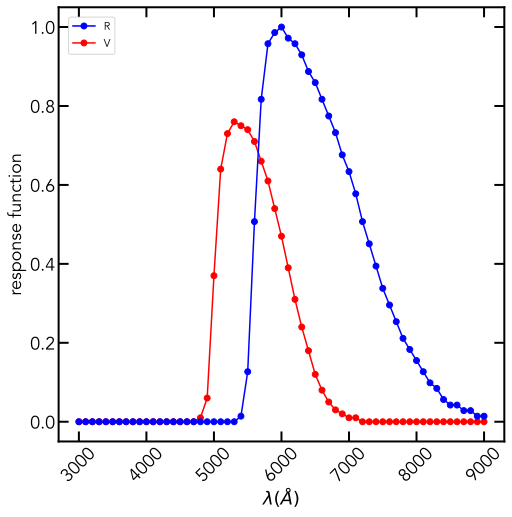

In [22]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_V[0].data,color='red',marker='o',label='V')
ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda(\AA)$')
ax.set_ylabel(r'response function')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(0.0,0.6)
#plt.legend()
fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


# Fermi_AGN_list_ned

In [25]:
Fermi_AGN_list=pd.read_excel('%s/FermiAGN_namelist_ned.xlsx'%root_dir,header=0,skiprows=[1,2])

In [26]:
Fermi_AGN_list.columns

Index(['Row', 'Unnamed: 1', '      Input Object Name       ', ' ',
       '         Object Name          ', '     RA     ', '    Dec     ',
       'Object', ' Redshift ', ' z  ', 'Row.1'],
      dtype='object')

In [27]:
Fermi_AGN_list_name_redshift=Fermi_AGN_list[['      Input Object Name       ',' Redshift ']]

In [28]:
Fermi_AGN_list_name_redshift

Input Object Name          Redshift 
0   PMN J0017-0512                       0.227
1   PKS 0106+013                              
2   MG1 J021114+1051                       0.2
3   3C 66A                                0.37
4   4C 28.07                             1.213
..                             ...         ...
75  B3 2247+381                         0.1187
76  PMN J2250-2806                       0.525
77  3C 454.3                             0.859
78  PMN J2345-1555                       0.621
79  1ES 2344+514                         0.044

[80 rows x 2 columns]

In [29]:
for i in range(len(Fermi_AGN_list_name_redshift)):
    if isinstance(Fermi_AGN_list_name_redshift.iloc[i][1],(int,float)):
        
        Fermi_AGN_list_name_redshift.loc[i,'z_value']=Fermi_AGN_list_name_redshift.iloc[i][1]
    else:
        Fermi_AGN_list_name_redshift.loc[i,'z_value']=0
        
        

/Users/brettlv/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/brettlv/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [30]:
Fermi_AGN_list_name_redshift_T=Fermi_AGN_list_name_redshift[Fermi_AGN_list_name_redshift['z_value']>0]
Fermi_AGN_list_name_redshift_T=drop_index(Fermi_AGN_list_name_redshift_T)

In [31]:
Fermi_AGN_list_name_redshift_T=Fermi_AGN_list_name_redshift_T.sort_values('z_value')

In [30]:
7000/6563-1

0.06658540301691307

## z<0.1

In [31]:
Fermi_AGN_z_lt0dot1=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['z_value']<0.1]

In [53]:
Fermi_AGN_z_lt0dot1=drop_index(Fermi_AGN_z_lt0dot1)

In [54]:
Fermi_AGN_z_lt0dot1

Input Object Name         Redshift    z_value
0  PKS 1510-08                      0.006815  0.006815
1  Mrk 421                          0.030021  0.030021
2  Mrk 501                          0.032983  0.032983
3  1ES 2344+514                        0.044  0.044000
4  1ES 1959+650                        0.048  0.048000
5  1H 0323+342                        0.0629  0.062900
6  BL Lac                             0.0686  0.068600

In [55]:
root_data_dir

'/Users/brettlv/Downloads/Fermi AGN optical monitoring program at Steward Observatory/Sources/'

In [59]:
Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]].values

array(['PKS 1510-08                   ', 'Mrk 421                       ',
       'Mrk 501                       ', '1ES 2344+514                  ',
       '1ES 1959+650                  ', '1H 0323+342                   ',
       'BL Lac                        '], dtype=object)

In [62]:
spec_info=pd.DataFrame([],columns=Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]].values)
#spec_info.columns=Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]].values

In [63]:
spec_info

Empty DataFrame
Columns: [PKS 1510-08                   , Mrk 421                       , Mrk 501                       , 1ES 2344+514                  , 1ES 1959+650                  , 1H 0323+342                   , BL Lac                        ]
Index: []

## 3C

In [7]:
Fermi_3C_sources=['3C 273','3C 279','3C 345','3C 454.3','3C 66A']

In [20]:
for i in Fermi_3C_sources:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=i.strip()
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    spec_num=0
    save_path_dir=os.path.join(root_data_dir,source_name_i)
    #print(save_path_dir)
    #os.chdir(save_path_dir)
    for file in os.listdir(save_path_dir):
        if os.path.isdir(os.path.join(save_path_dir,file)):
            #print(file)
            specfiles=os.listdir(os.path.join(save_path_dir,file))
            for specfile in specfiles:
                if specfile.find('spec')>0 and specfile.endswith('.fits'):
                    spec_num=spec_num+1    
                    #print(specfile[-11:-5])
    print(source_Name_i,spec_num)        


3C 273 386
3C 279 633
3C 345 48
3C 454.3 715
3C 66A 423


In [ ]:
3C 273

In [37]:
146.8*(1+0.158339)

170.0441652

### 3C273

3c273 3C 273 0.158339
887


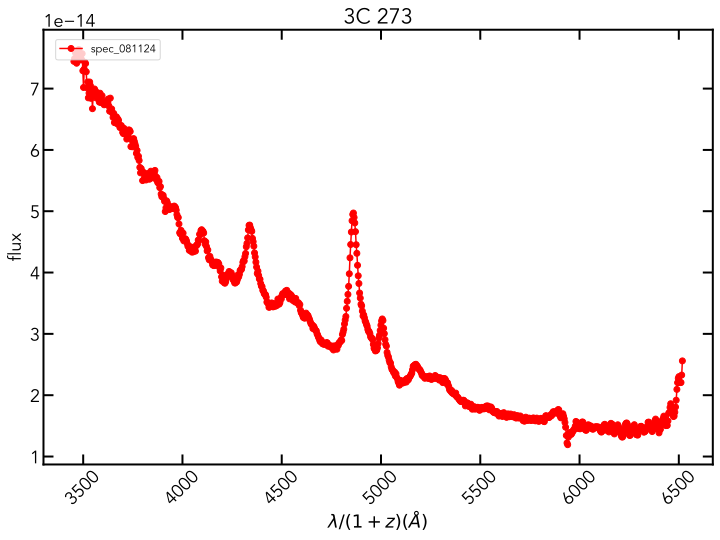

In [42]:
#source_name='pks1510'
source_Name='3C 273'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]


source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'3c273.fc.spec_081124.fits')
spec_path_fig=spec_path+'.png'

date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))


fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))

ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(5000,7400)
#plt.legend()
#spec_path_fig

#fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## spec_Num

In [79]:
for i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=i.strip()
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    spec_num=0
    save_path_dir=os.path.join(root_data_dir,source_name_i)
    #print(save_path_dir)
    #os.chdir(save_path_dir)
    for file in os.listdir(save_path_dir):
        if os.path.isdir(os.path.join(save_path_dir,file)):
            #print(file)
            specfiles=os.listdir(os.path.join(save_path_dir,file))
            for specfile in specfiles:
                if specfile.find('spec')>0 and specfile.endswith('.fits'):
                    spec_num=spec_num+1    
                    #print(specfile[-11:-5])
    print(source_Name_i,spec_num)        


PKS 1510-08 451
Mrk 421 843
Mrk 501 609
1ES 2344+514 238
1ES 1959+650 195
1H 0323+342 3
BL Lac 757


Name spec_NUM
PKS 1510-08 451
Mrk 421 843
Mrk 501 609
1ES 2344+514 238
1ES 1959+650 195
1H 0323+342 3
BL Lac 757

## Rband_num

In [82]:
i=0
Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))

In [85]:
Rphot['Object'][0]

'1ES1959+650'

In [89]:
for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    source_name_i=Source_name_dict[source_Name_i]
    print(source_Name_i)

PKS 1510-08
Mrk 421
Mrk 501
1ES 2344+514
1ES 1959+650
1H 0323+342
BL Lac


In [93]:
for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    Rband_num=0 
    
    for i in range(10):
        Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))
        Rphot_name= Rphot[Rphot['Object']==source_Name_i_Rband]   
        Rband_num=len(Rphot_name)+Rband_num
    print(source_Name_i,Rband_num)          
        

PKS 1510-08 382
Mrk 421 595
Mrk 501 485
1ES 2344+514 200
1ES 1959+650 151
1H 0323+342 3
BL Lac 732


## Rbandplot

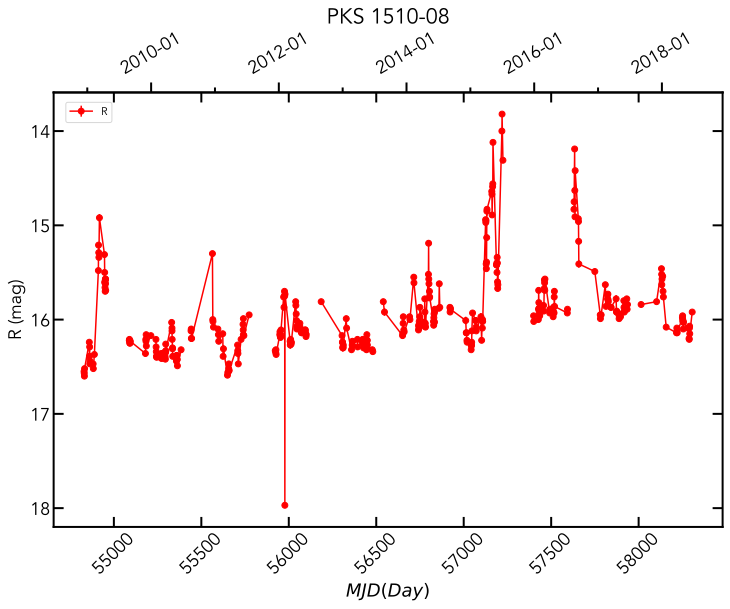

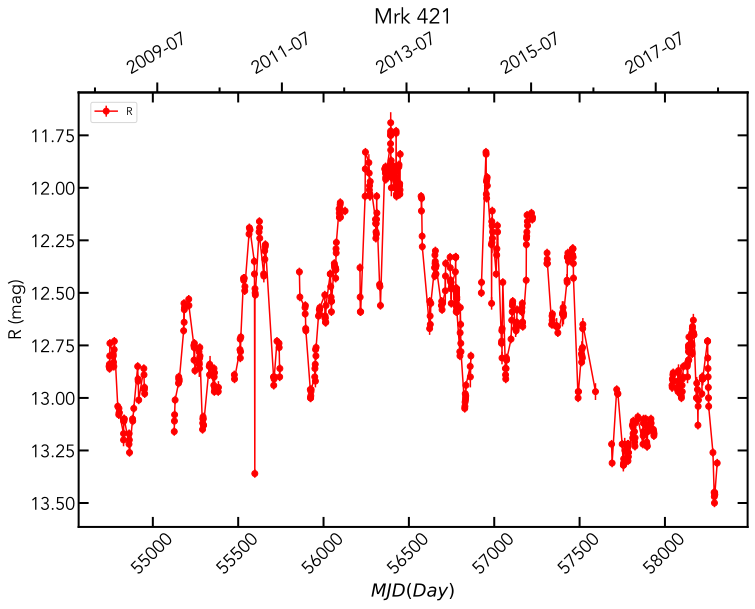

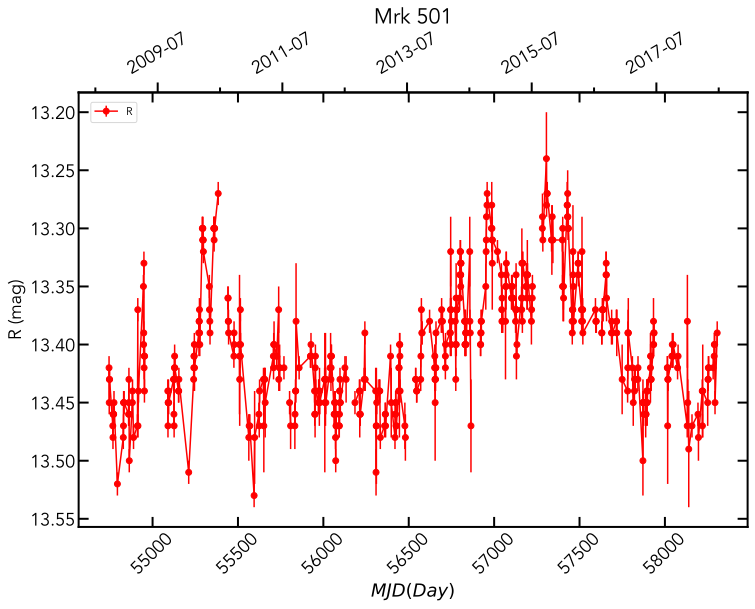

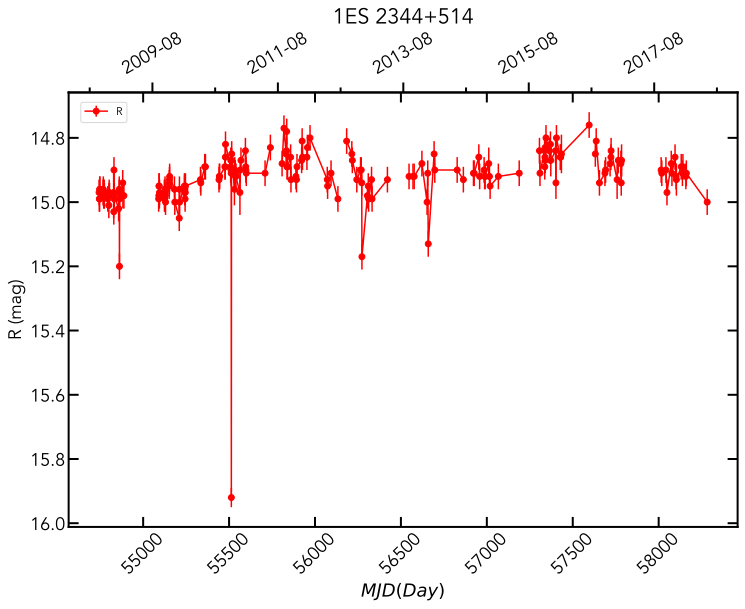

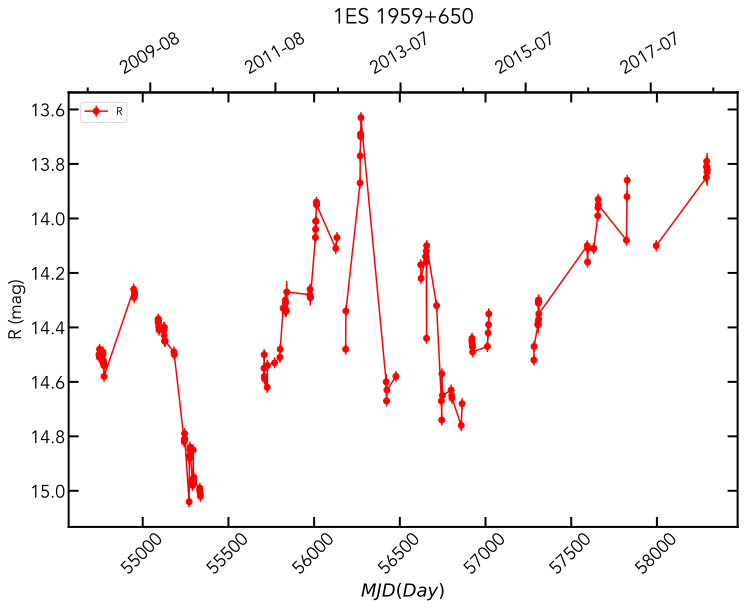

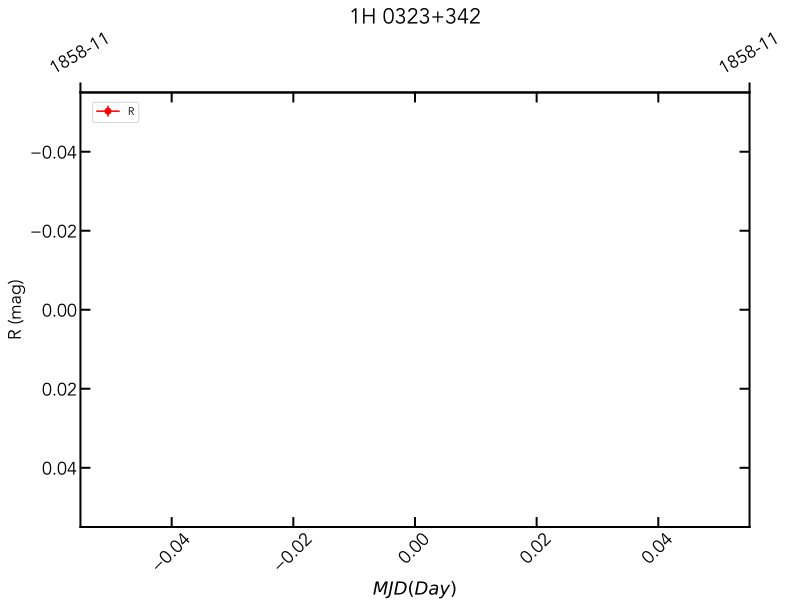

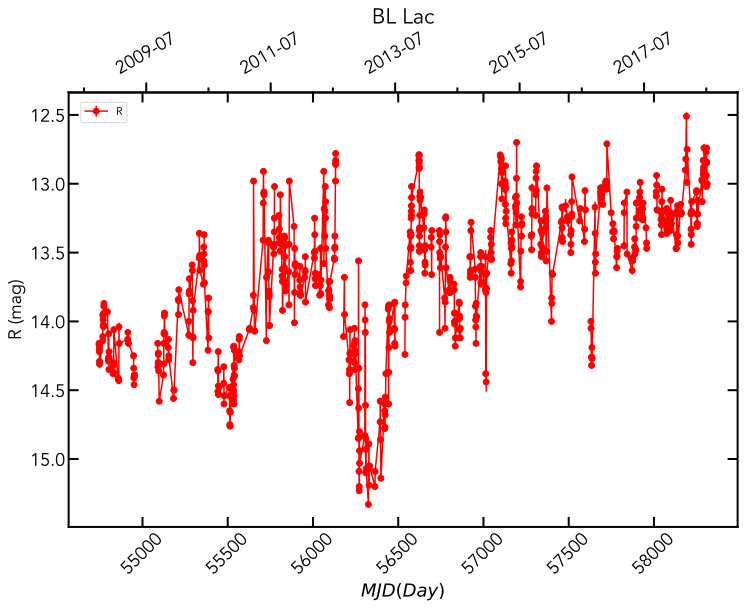

In [112]:
for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    #Rband_num=0 
    pol_path_fig=os.path.join(root_dir,source_name_i+'_Rphot_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111) 
    
    for i in range(10):
        Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))
        Rphot_name= Rphot[Rphot['Object']==source_Name_i_Rband]   
        
        ax.errorbar(x=Rphot_name['JD']- 2400000.5,
                    y=Rphot_name['R'],
                    yerr=Rphot_name['σ(R)'],
                    color='red',marker='o',label='R')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    
    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)
        
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'R (mag)')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')        
        

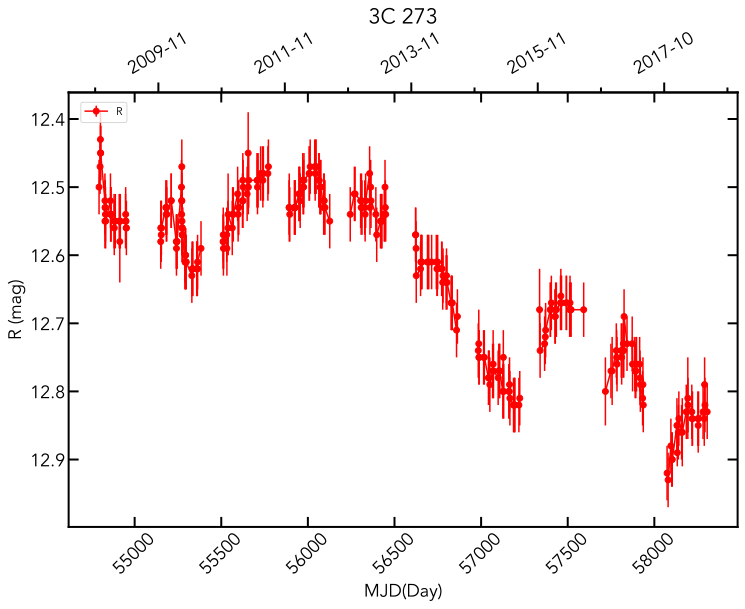

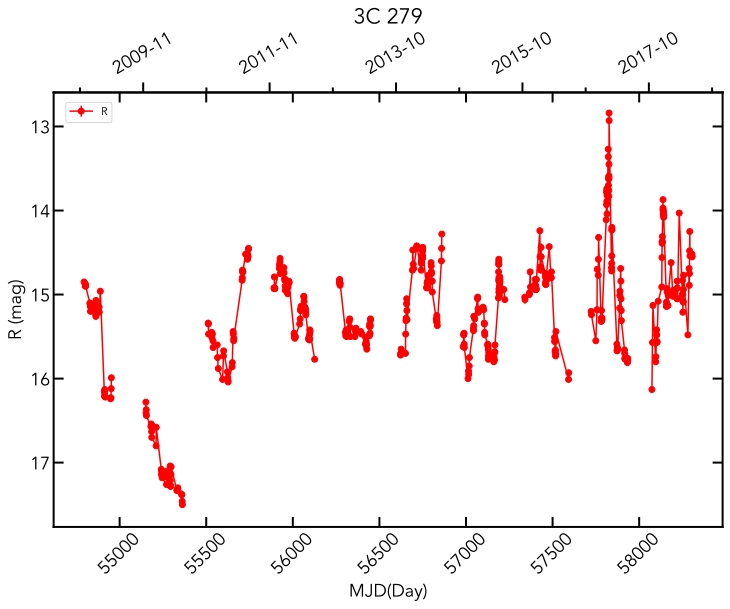

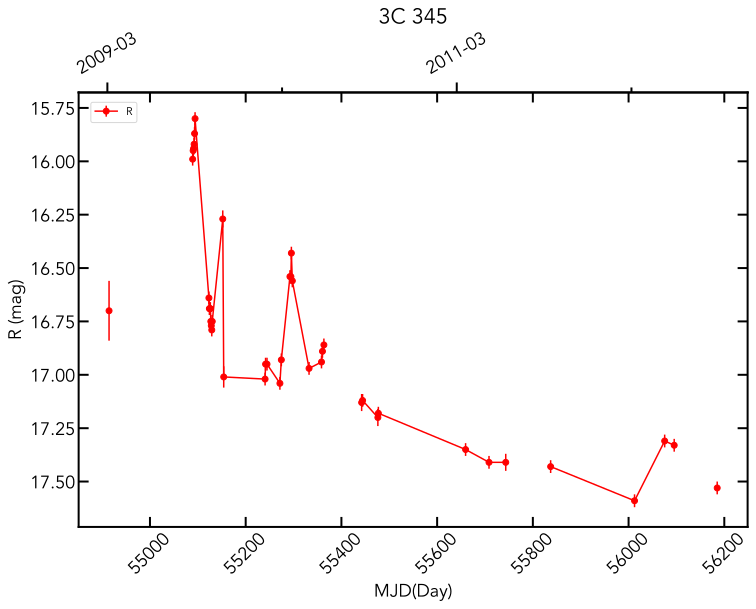

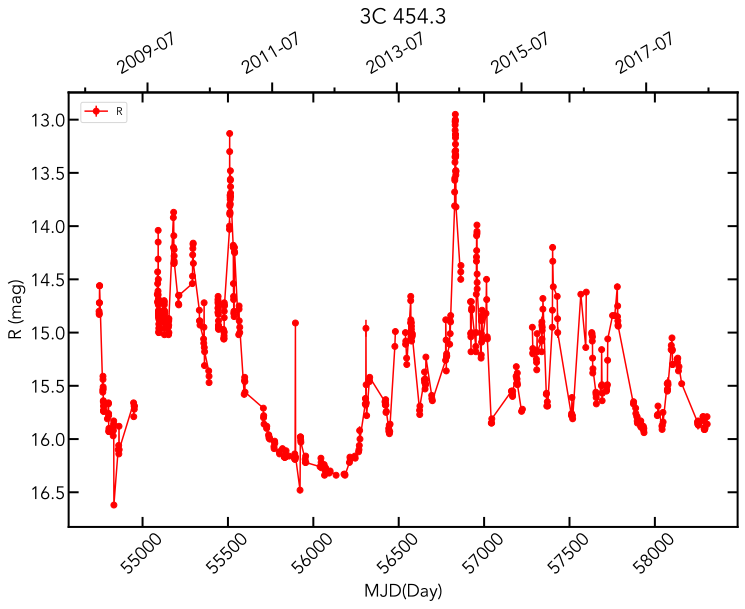

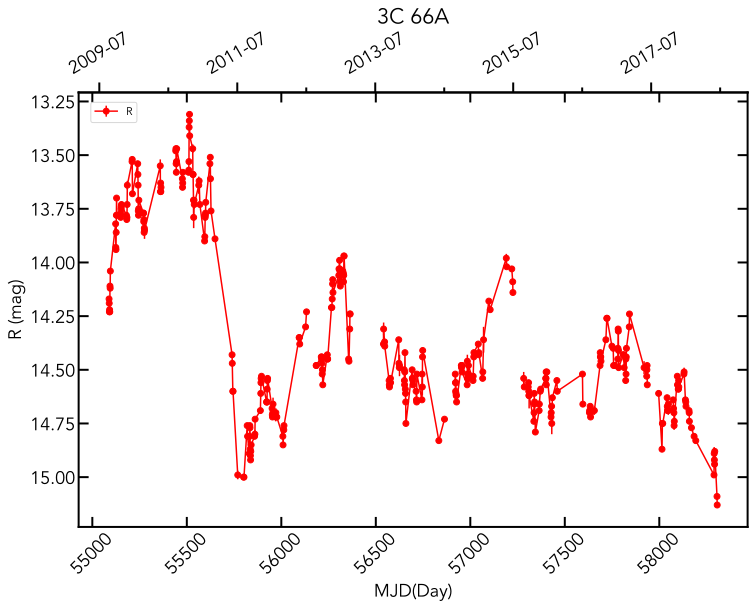

In [51]:
#for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
for name_i in Fermi_3C_sources:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    #Rband_num=0 
    pol_path_fig=os.path.join(root_dir,source_name_i+'_Rphot_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111) 
    
    for i in range(10):
        Rphot=pd.read_excel(os.path.join(Rphot_dir,'Rphot_Cycle%d.xlsx'%(i+1)))
        Rphot_name= Rphot[Rphot['Object']==source_Name_i_Rband]   
        
        ax.errorbar(x=Rphot_name['JD']- 2400000.5,
                    y=Rphot_name['R'],
                    yerr=Rphot_name['σ(R)'],
                    color='red',marker='o',label='R')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    
    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)
        
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'R (mag)')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')        
        

## poloarization

In [95]:
source_name_i='pks1510'
prefix=''
Poldata=pd.read_excel(os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx'))
       

In [45]:
Poldata.columns[10],Poldata.columns[9]

('s (P) (%)', 'P (%)')

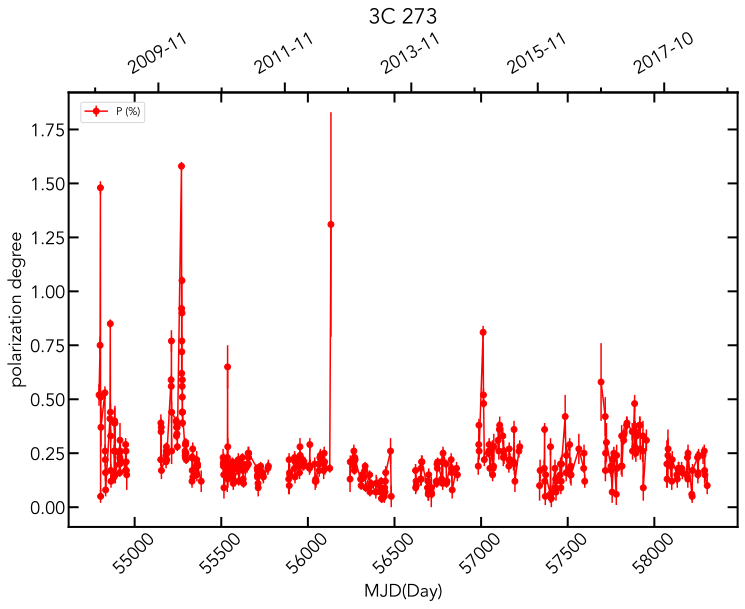

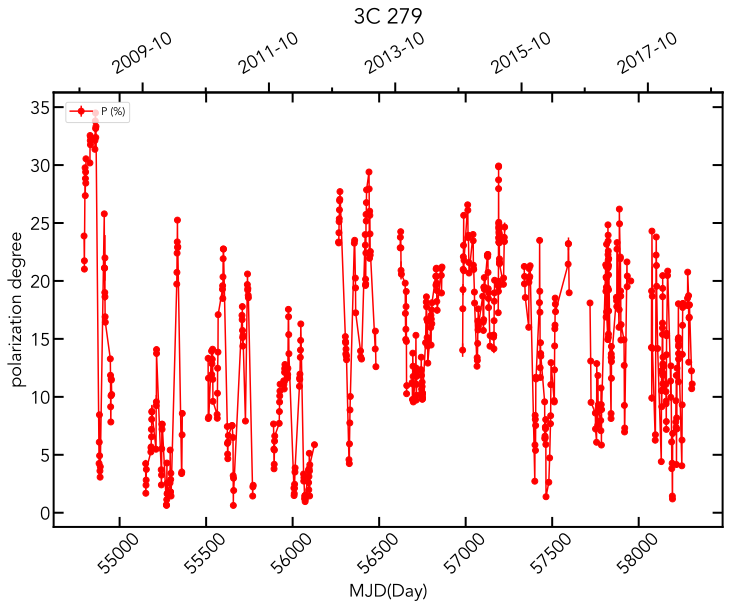

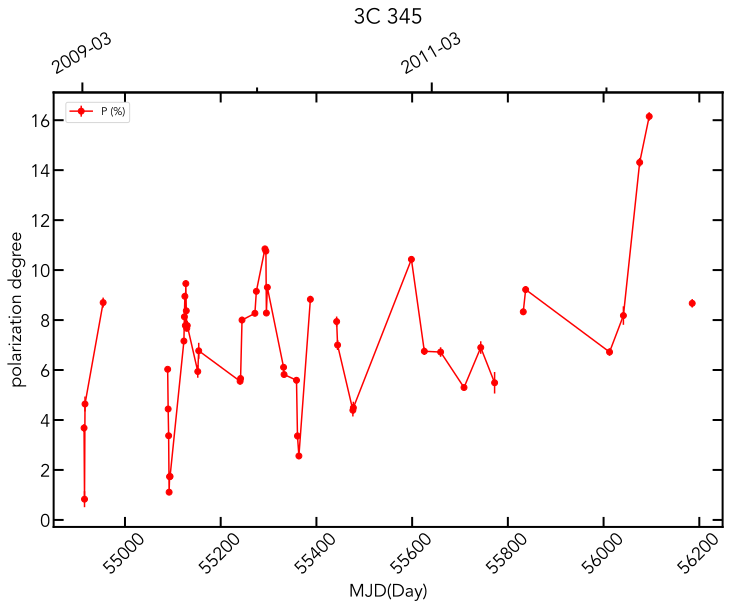

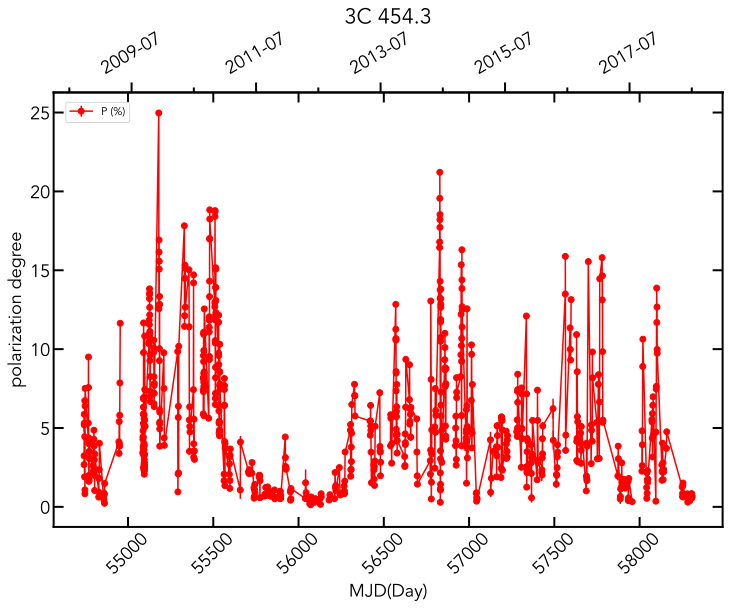

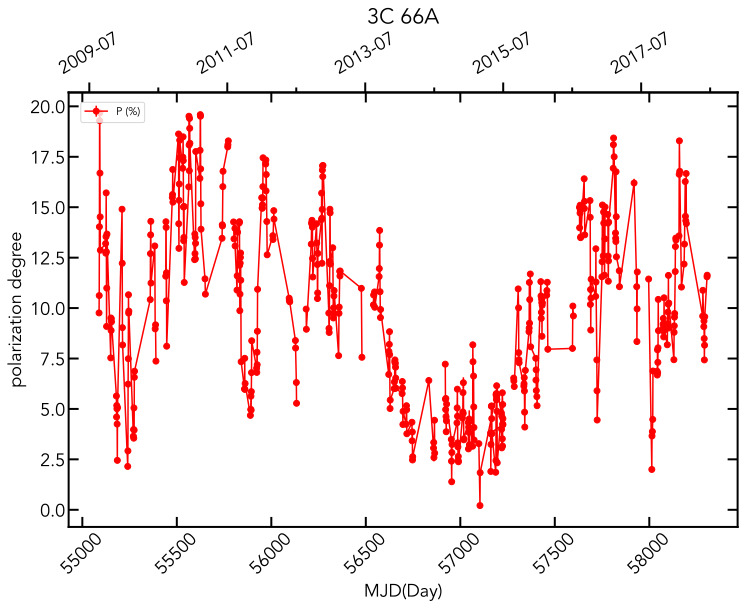

In [46]:
#for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
for name_i in Fermi_3C_sources:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    pol_path_fig=os.path.join(root_dir,source_name_i+'_pol_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)    
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_pol'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)              
            ax.errorbar(x=Poldata['JD']- 2400000.5,
                    #y=Poldata['P (%)'],
                    #yerr=Poldata['σ(P) (%)'],
                    y=Poldata[Poldata.columns[9]],
                    yerr=Poldata[Poldata.columns[10]],    
                    color='red',marker='o',label='P (%)')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'polarization degree')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    ax.set_xlim(54800,57200)
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')
        #fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## Vphot

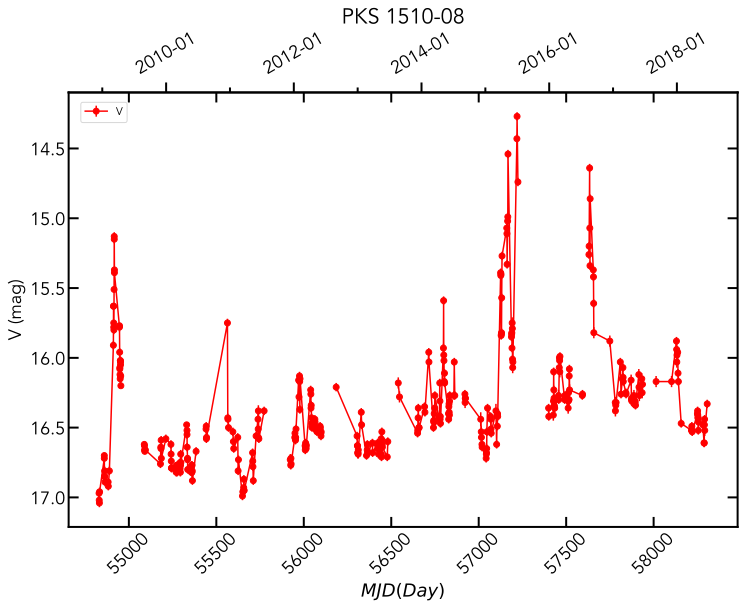

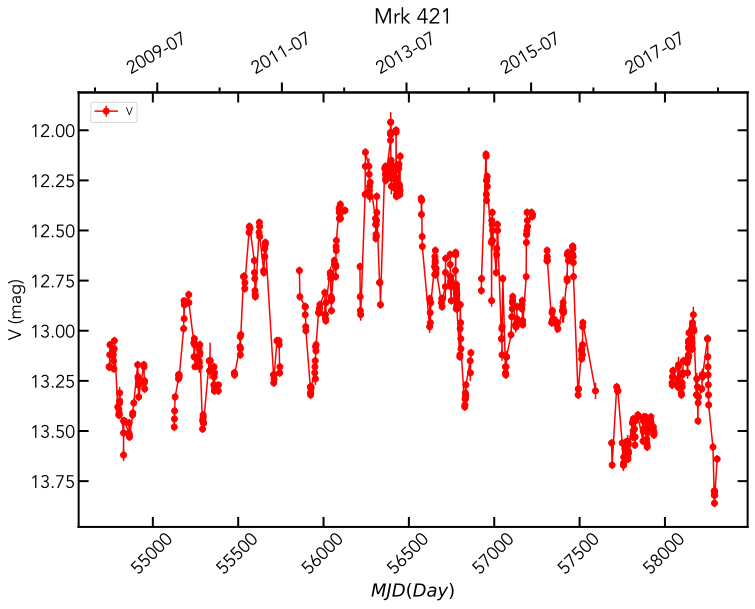

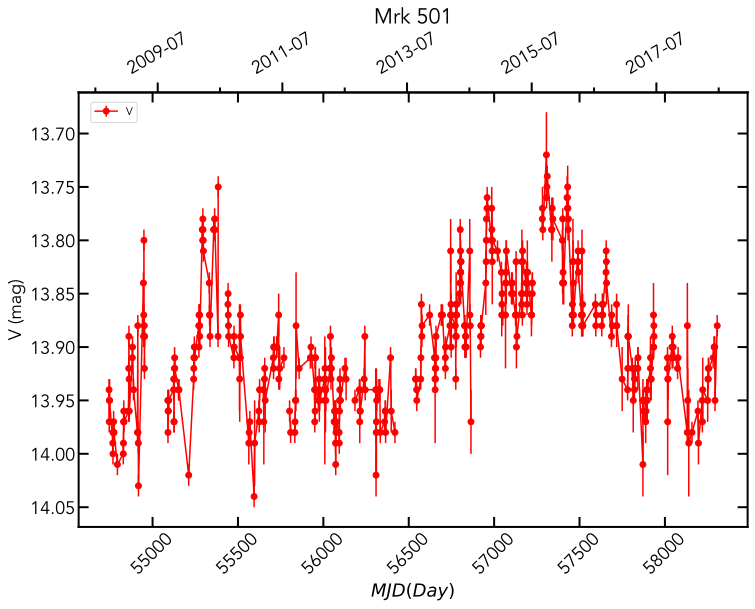

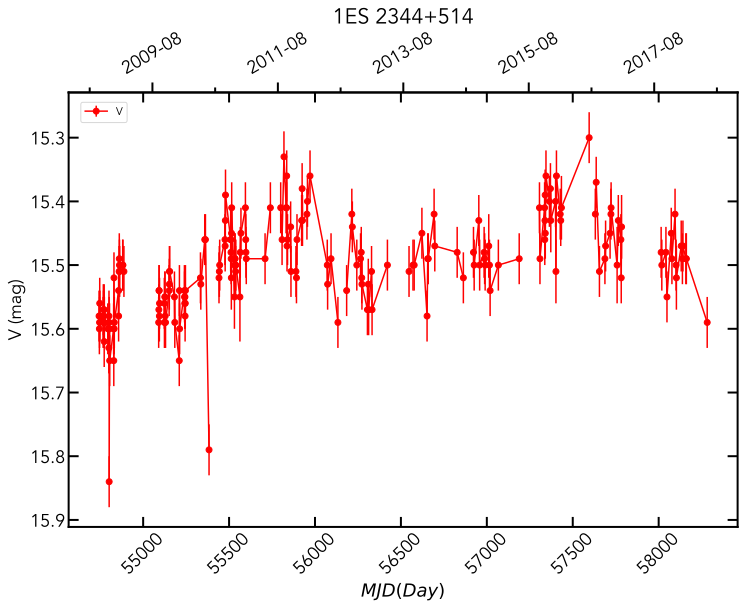

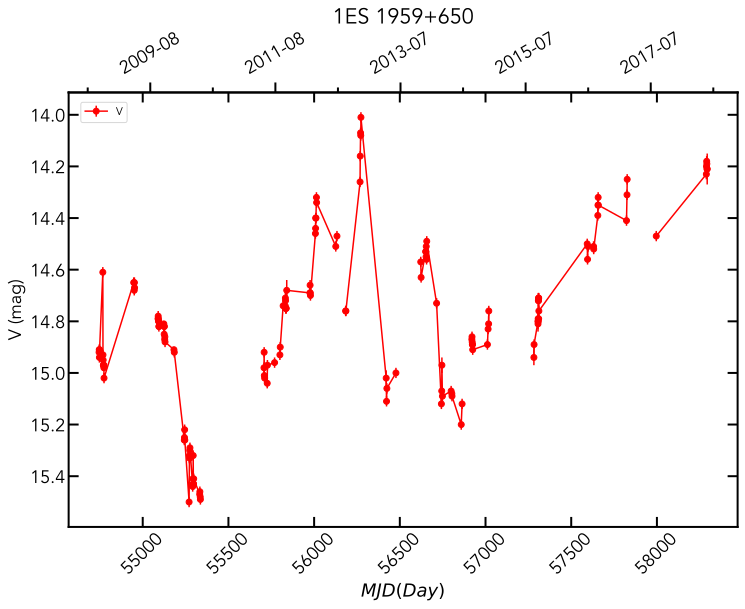

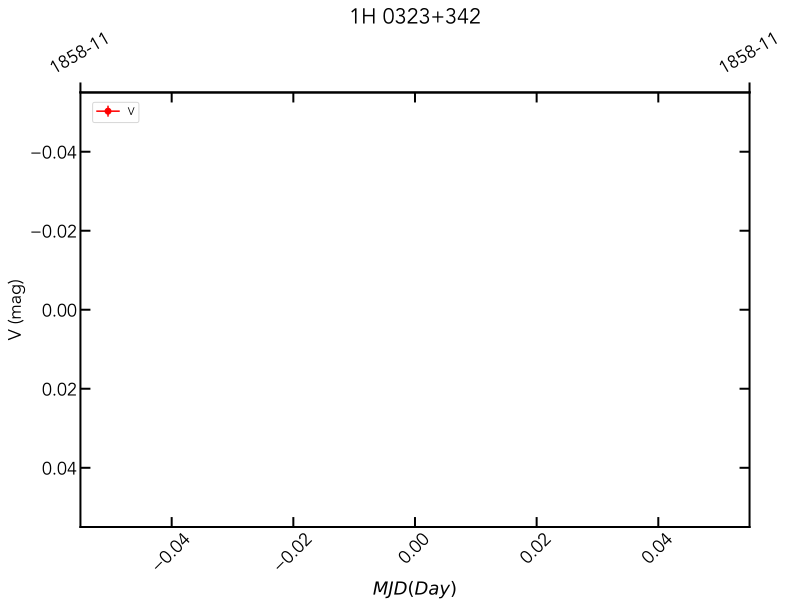

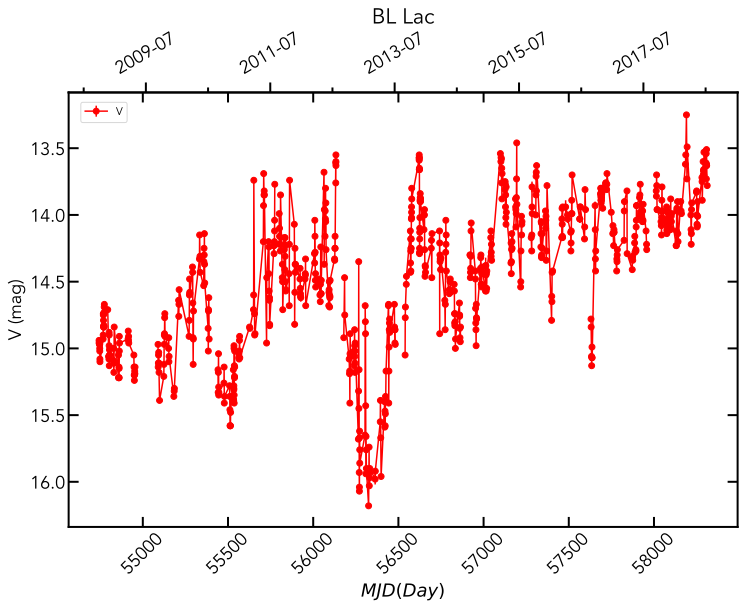

In [110]:
for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    pol_path_fig=os.path.join(root_dir,source_name_i+'_Vphot_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)    
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_phot'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)        
            ax.errorbar(x=Poldata['JD']- 2400000.5,
                    y=Poldata['V'],
                    yerr=Poldata['σ(V)'],
                    color='red',marker='o',label='V')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    
    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)
        
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'V (mag)')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')
        #fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


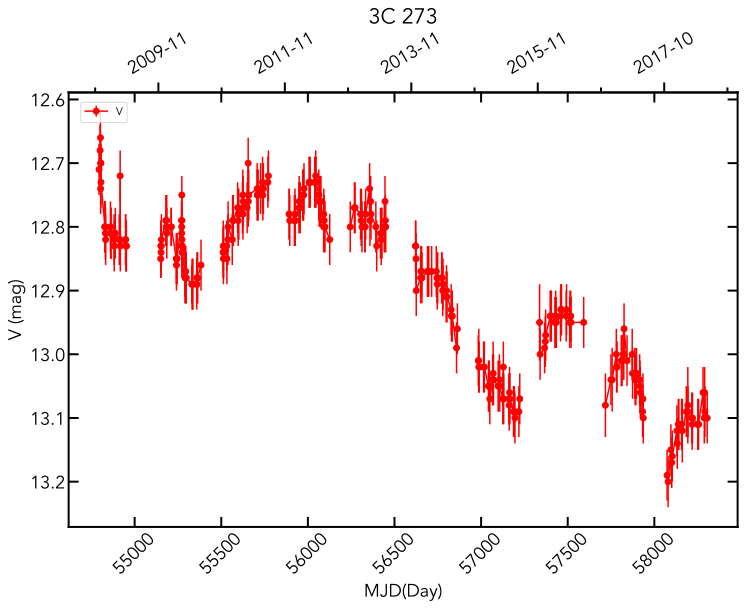

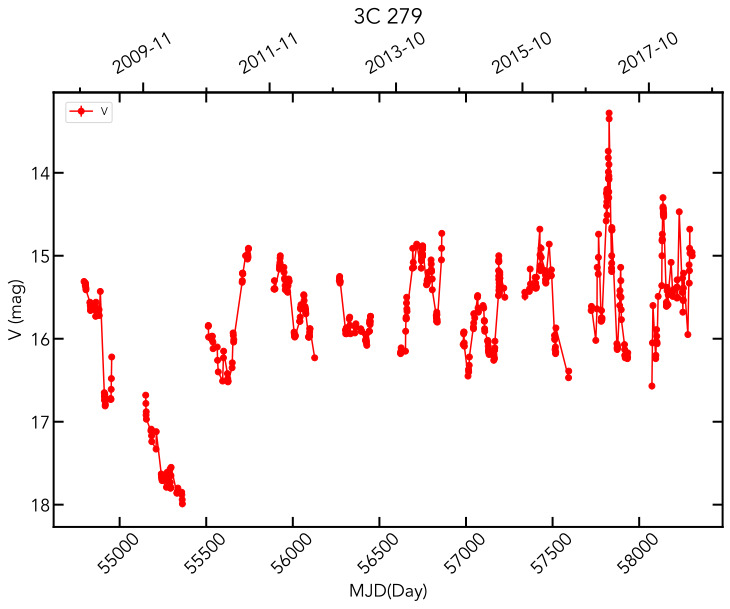

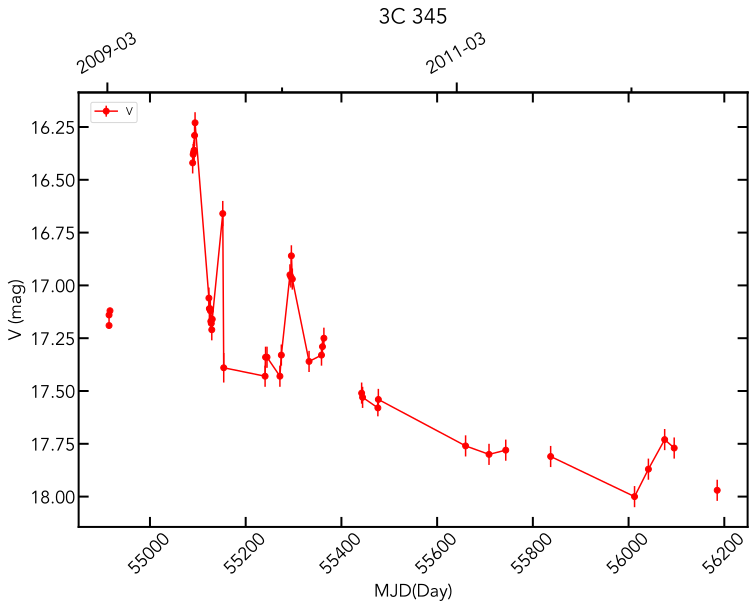

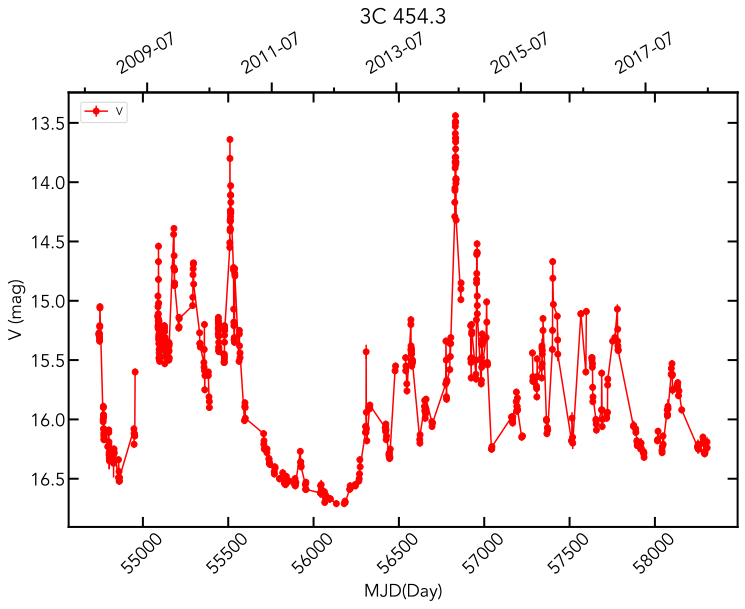

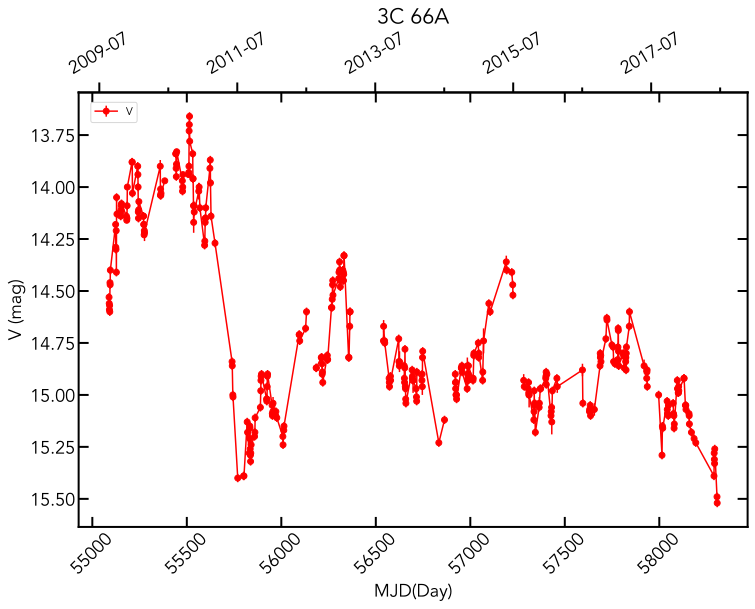

In [53]:
#for name_i in Fermi_AGN_z_lt0dot1[Fermi_AGN_z_lt0dot1.columns[0]]:
for name_i in Fermi_3C_sources:    
    #url_source=root_obj_url+i+'.html'
    #print(url_source)
    #print(i)
    source_Name_i=name_i.strip()
    
    if source_Name_i.startswith('PKS') or source_Name_i.startswith('1ES') or source_Name_i.startswith('1H'):
        source_Name_i_Rband=source_Name_i.replace(' ','')
    
    else:
        source_Name_i_Rband=source_Name_i
        
    source_name_i=Source_name_dict[source_Name_i]
    #source_name=Source_name_dict[source_Name]  
    
    pol_path_fig=os.path.join(root_dir,source_name_i+'_Vphot_lc.png')
    
    fig = plt.figure(figsize=(12,8))
    fig.subplots_adjust(hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)    
    
    for i in range(10):
        if i==0:
            prefix=''
        else:
            prefix='_%d'%(i+1)
        
        Polpath=os.path.join(root_data_dir,source_name_i,'%s_phot'%source_name_i+prefix+'.xlsx')
        if os.path.exists(Polpath):
            Poldata=pd.read_excel(Polpath)        
            ax.errorbar(x=Poldata['JD']- 2400000.5,
                    #y=Poldata['V'],
                    #yerr=Poldata['σ(V)'],
                        y=Poldata[Poldata.columns[7]],
                        yerr=Poldata[Poldata.columns[8]],
                        
                        
                    color='red',marker='o',label='V')

    set_ax_tick(ax)
    plot_secax(ax,mi_interval=365,ma_interval=365*2)
    
    bottom, top = ax.set_ylim() 
    if bottom< top:
        ax.set_ylim(top,bottom)
        
    #ax.set_xlabel('Type')
    #ax2.set_xlabel('Type')
    ax.set_xlabel(r'MJD(Day)')
    ax.set_ylabel(r'V (mag)')

    ax.set_title(source_Name_i)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    #hdl = [h[0] for h in handles]
    hdl = handles
    labels_dict=dict(zip(labels, hdl)) #key,values
    by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

    # use them in the legend
    #by_label = OrderedDict(zip(labels, handles)) 
    #ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )
    #ax.semilogy()
    #ax.semilogx()
    #ax.set_xlim(0.0,0.6)
    #plt.legend()
    #spec_path_fig
    fig.savefig(pol_path_fig, dpi=400, transparent=False, bbox_inches='tight')
        #fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## spec

The spectra span the range of 4000-7550 Å with a dispersion 4 Å/pixel. Depending on the width of the slit used for the observation, the resolution is typically between 16-24 Å

In [33]:
Fermi_AGN_list_name_redshift_T.columns

Index(['      Input Object Name       ', ' Redshift ', 'z_value'], dtype='object')

In [34]:
Fermi_AGN_list_name_redshift_T.iloc[0][0]

'PKS 1510-08                   '

### pks1510

pks1510 PKS 1510-08 0.006815
889


(5000.0, 7400.0)

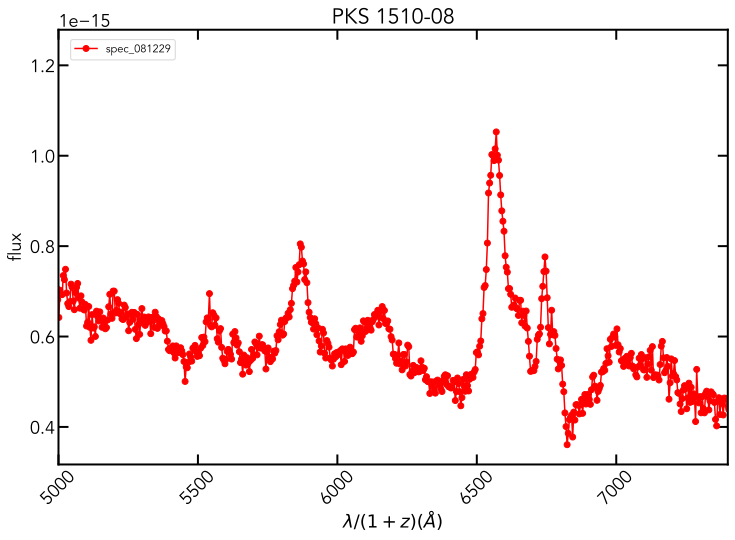

In [128]:
#source_name='pks1510'
source_Name='PKS 1510-08'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]


source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'pks1510.fc.spec_081229.fits')
spec_path_fig=spec_path+'.png'

date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))


fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))

ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

ax.set_xlim(5000,7400)
#plt.legend()
#spec_path_fig

#fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


In [123]:
spec_hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                  889 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
IRAF-TLM= '23:06:29 (09/07/2009)' / Time of last modification                   
OBJECT  = 'PKS1510-089'        /                                                
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2009-07-10T05:57:10'                                                 
IRAF-MAX=           1.127600E4  /  DATA MAX                                     
IRAF-MIN=           1.950000E3  /  DATA MIN                                     
DATE-OBS= '2008-12-29' /                                                        
UT      = '12:48:54.00'     

In [104]:
3912+888*4

7464

pks1510 PKS 1510-08 0.361
889


(4200.0, 5400.0)

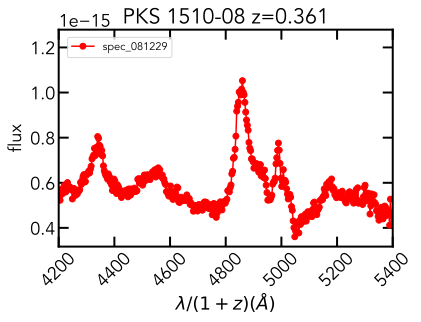

In [39]:
#z_pks1510 = 0.361

#source_name='pks1510'
source_Name='PKS 1510-08'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]


source_z=0.361
datatypes=['phot','pol']

print(source_name,source_Name,source_z)

spec_path=os.path.join(root_data_dir,source_name,source_name,'pks1510.fc.spec_081229.fits')
spec_path_fig=spec_path+'.png'

date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))

ax.plot(lambda_spec/(1+source_z),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name+' z=%.3f'%source_z)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

ax.set_xlim(4200,5400)
#plt.legend()
#spec_path_fig

#fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


### z_pks1510 = 0.361

pks1510 PKS 1510-08 0.361
889


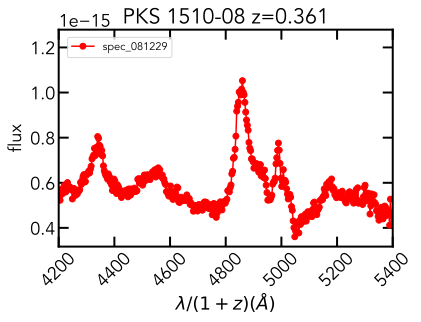

In [23]:
#z_pks1510 = 0.361

#source_name='pks1510'
source_Name='PKS 1510-08'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]


source_z=0.361
datatypes=['phot','pol']

print(source_name,source_Name,source_z)

spec_path=os.path.join(root_data_dir,source_name,source_name,'pks1510.fc.spec_081229.fits')
spec_path_fig=spec_path+'_z=0.361_.png'

date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))

ax.plot(lambda_spec/(1+source_z),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name+' z=%.3f'%source_z)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

ax.set_xlim(4200,5400)
#plt.legend()
#spec_path_fig

fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


pks1510 PKS 1510-08 0.361
889


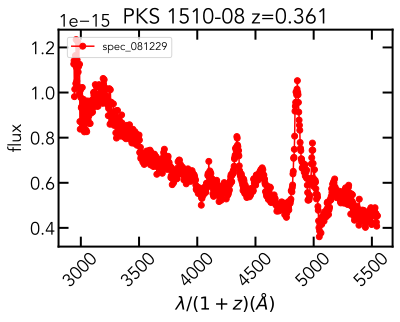

In [38]:
#z_pks1510 = 0.361

#source_name='pks1510'
source_Name='PKS 1510-08'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]


source_z=0.361
datatypes=['phot','pol']

print(source_name,source_Name,source_z)

spec_path=os.path.join(root_data_dir,source_name,source_name,'pks1510.fc.spec_081229.fits')
spec_path_fig=spec_path+'_z=0.361_.png'

date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



fig = plt.figure(figsize=(6,4))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))

ax.plot(lambda_spec/(1+source_z),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name+' z=%.3f'%source_z)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(4200,5400)
#plt.legend()
#spec_path_fig

#fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


### Mrk 421

In [41]:
#source_name='pks1510'
source_Name='Mrk 421'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'mrk421.fc.spec_081004.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]
spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))

mrk421 Mrk 421 0.030021
888


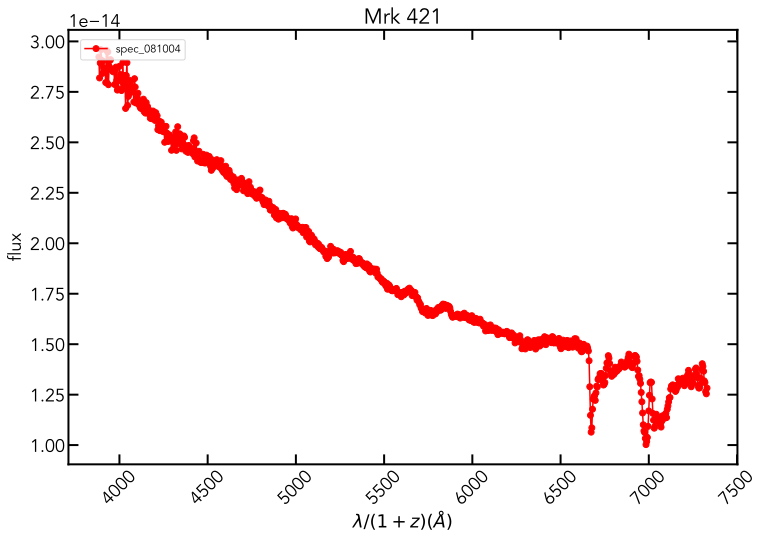

In [42]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


### Mrk 501

In [43]:
#source_name='pks1510'
source_Name='Mrk 501'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'mrk501.fc.spec_081006.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



mrk501 Mrk 501 0.032983
864


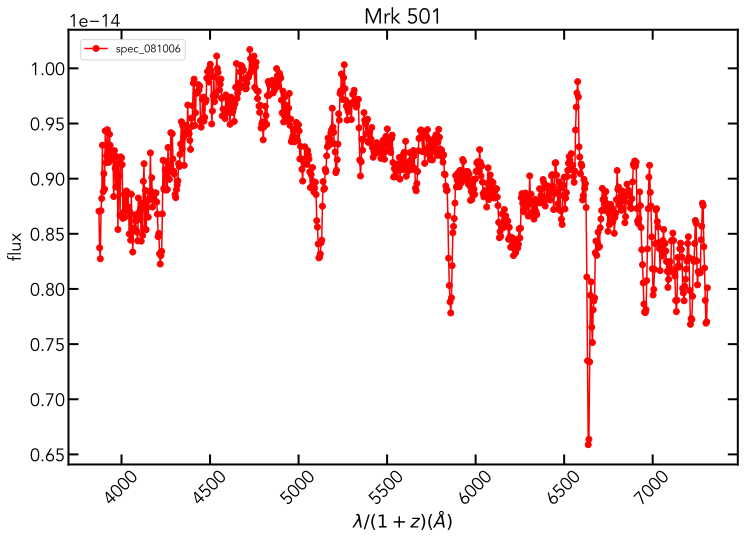

In [44]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## 1ES 2344+514

In [45]:
#source_name='pks1510'
source_Name='1ES 2344+514'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'1es2344.spec_081003.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



1es2344 1ES 2344+514 0.044
888


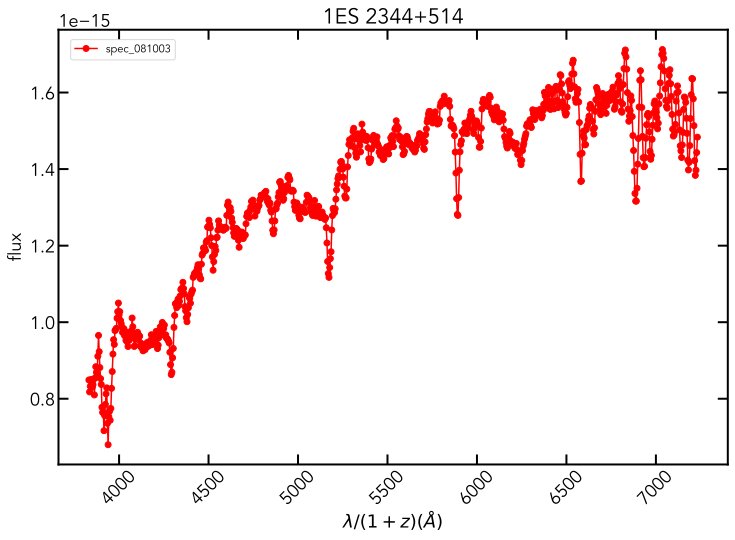

In [46]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## 1ES 1959+650

In [47]:
#source_name='pks1510'
source_Name='1ES 1959+650'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'1es1959.spec_081004.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



1es1959 1ES 1959+650 0.048
888


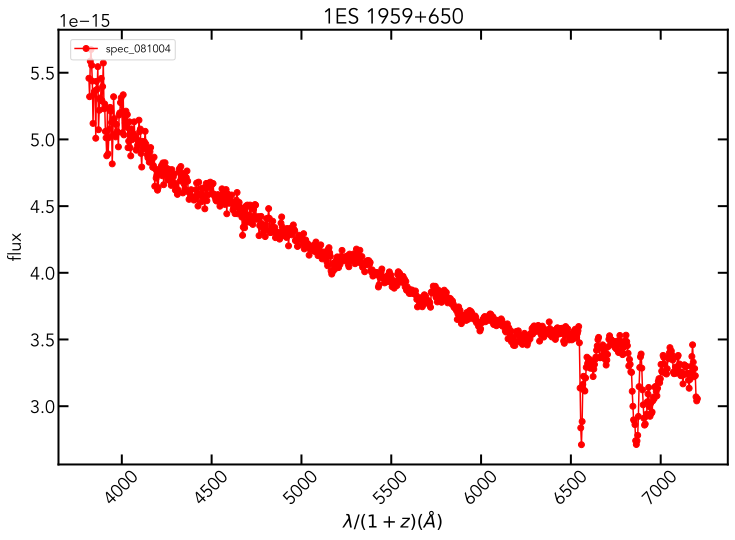

In [48]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


## 1H 0323+342

1h0323 1H 0323+342 0.0629
889


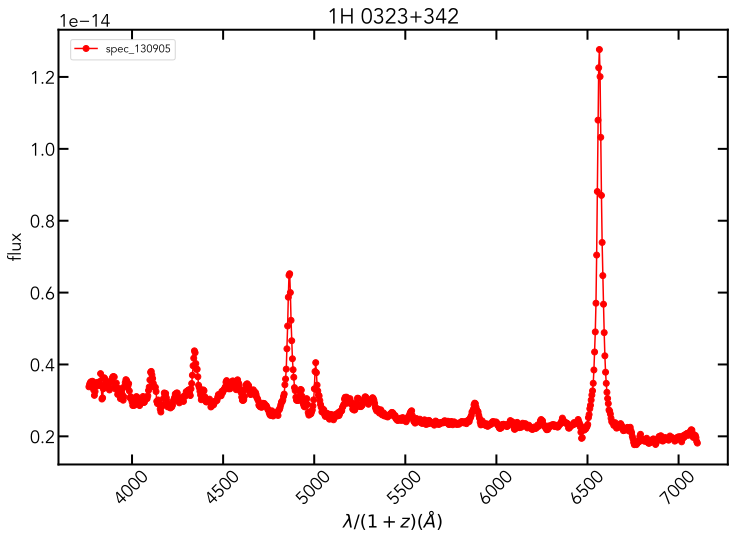

In [32]:
#source_name='pks1510'
source_Name='1H 0323+342'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name+'_6','1h0323.spec_130905.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')



1h0323 1H 0323+342 0.0629
889


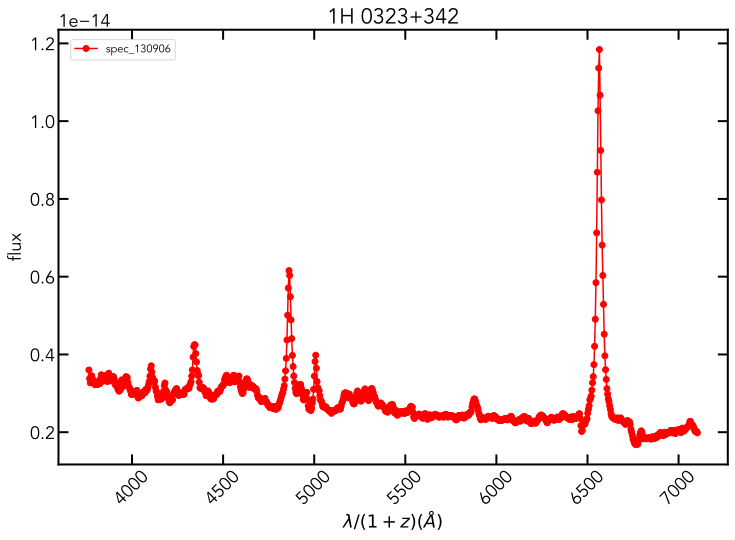

In [33]:
#source_name='pks1510'
source_Name='1H 0323+342'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name+'_6','1h0323.spec_130906.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')



1h0323 1H 0323+342 0.0629
888


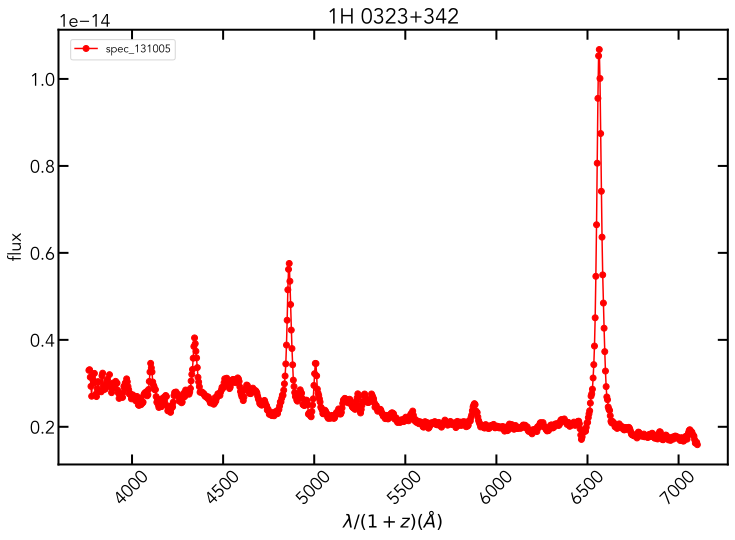

In [34]:
#source_name='pks1510'
source_Name='1H 0323+342'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name+'_6','1h0323.spec_131005.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')

ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')



## BL Lac

In [51]:
#source_name='pks1510'
source_Name='BL Lac'
#source_Name=Source_Name_dict[source_name]
source_name=Source_name_dict[source_Name]

source_z=Fermi_AGN_list_name_redshift_T[Fermi_AGN_list_name_redshift_T['      Input Object Name       '].str.strip()==source_Name]['z_value']
datatypes=['phot','pol']

print(source_name,source_Name,source_z.values[0])

spec_path=os.path.join(root_data_dir,source_name,source_name,'bllac.fc.spec_081004.fits')
spec_path_fig=spec_path+'.png'
date_spec_path=spec_path.split('.')[-2]

spec_hdul=fits.open(spec_path)
print(len(spec_hdul[0].data))



bllac BL Lac 0.0686
889


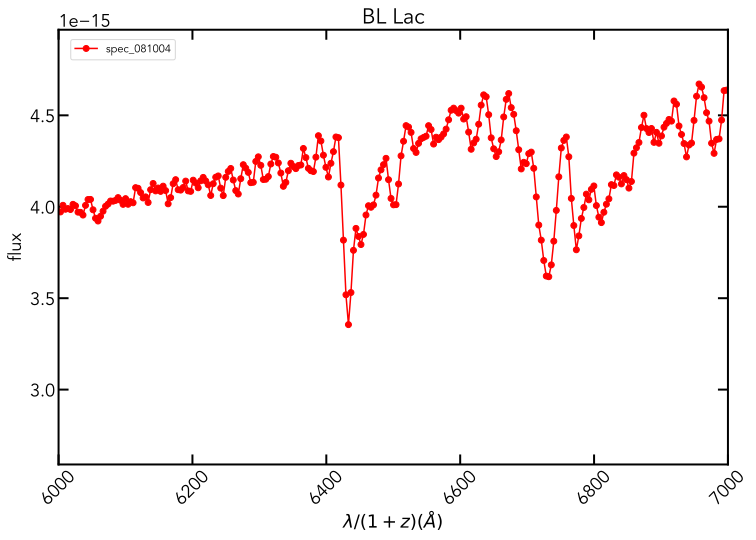

In [52]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


lambda_spec=np.linspace(4000,7550,len(spec_hdul[0].data))
ax.plot(lambda_spec/(1+source_z.values[0]),spec_hdul[0].data,color='red',marker='o',label=date_spec_path)
#ax.plot(Fermi_monitir_lambdas,Fermi_monitor_AGN_R[0].data,color='blue',marker='o',label='R')

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'$\lambda/(1+z)(\AA)$')
ax.set_ylabel(r'flux')
ax.set_xlim(6000,7000)
ax.set_title(source_Name)

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()
fig.savefig(spec_path_fig, dpi=400, transparent=False, bbox_inches='tight')

#ax.set_xlim(0.0,0.6)
#plt.legend()
#fig.savefig('tansmission_curve_V_R.png', dpi=400, transparent=False, bbox_inches='tight')


In [40]:
#Fermi_AGN_list_redshift=Fermi_AGN_list_name_redshift.dropna(axis = 0)
#Fermi_AGN_list_redshift=drop_index(Fermi_AGN_list_redshift)

In [52]:
len(Fermi_AGN_list_redshift)

80

In [51]:
Fermi_AGN_list_redshift.iloc[2][1]

0.2

(array([18., 11., 11., 12.,  3.,  4.,  2.,  2.,  2.,  2.]),
 array([0.006815, 0.27513350000000003, 0.543452, 0.8117705000000001,
        1.080089, 1.3484075, 1.616726, 1.8850445000000002, 2.153363,
        2.4216815, 2.69], dtype=object),
 <BarContainer object of 10 artists>)

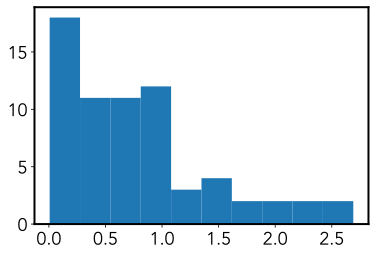

In [62]:
plt.hist(Fermi_AGN_list_name_redshift_T[' Redshift '])

(array([18., 11., 11., 12.,  3.,  4.,  2.,  2.,  2.,  2.]),
 array([5134.7565, 6503.180850000001, 7871.6052, 9240.02955, 10608.4539,
        11976.878250000002, 13345.302599999999, 14713.72695,
        16082.151300000001, 17450.57565, 18819.0], dtype=object),
 <BarContainer object of 10 artists>)

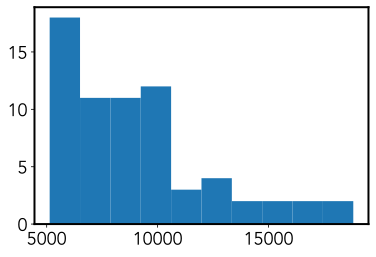

In [64]:
plt.hist(5100*(1+Fermi_AGN_list_name_redshift_T[' Redshift ']))

(array([18., 11., 11., 12.,  3.,  4.,  2.,  2.,  2.,  2.]),
 array([4894.127715, 6198.4239435, 7502.720171999999, 8807.0164005,
        10111.312629, 11415.6088575, 12719.905085999999,
        14024.201314500002, 15328.497543000001, 16632.7937715, 17937.09],
       dtype=object),
 <BarContainer object of 10 artists>)

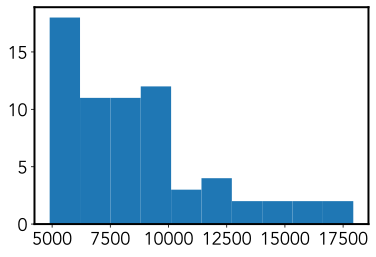

In [65]:
plt.hist(4861*(1+Fermi_AGN_list_name_redshift_T[' Redshift ']))

(array([18., 11., 11., 12.,  3.,  4.,  2.,  2.,  2.,  2.]),
 array([6607.726845, 8368.7011605, 10129.675476, 11890.6497915,
        13651.624107, 15412.5984225, 17173.572738000003,
        18934.547053500002, 20695.521369000002, 22456.4956845, 24217.47],
       dtype=object),
 <BarContainer object of 10 artists>)

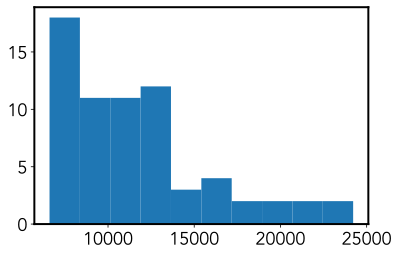

In [66]:
plt.hist(6563*(1+Fermi_AGN_list_name_redshift_T[' Redshift ']))

# Halpha Hbeta

In [104]:
z_3c273=0.158339
6563*(1+z_3c273),4861*(1+z_3c273)

(7602.178857, 5630.685879)

In [108]:
7000/6563-1

0.06658540301691307

In [119]:
6563/4861-1

0.35013371734211063

In [121]:
4861*(1+0.361),6563*(1+0.006815)

(6615.821, 6607.726845)

# SMA

In [70]:
sma_url='http://sma1.sma.hawaii.edu/callist/callist.html'

In [71]:
all_tables = pd.read_html(sma_url)
sma_table=all_tables[3] 

In [83]:
sma_table

Source Name            J2000 Coordinates(from VLA)                  Band  \
         common IAU(J2000)                          RA            Dec   Band   
0            --   0004-476                00:04:35.640   -47:36:19.73    1mm   
1            --   0005+383               00:05:57.1754  +38:20:15.148    1mm   
2            --   0005+383               00:05:57.1754  +38:20:15.148  850µm   
3            --   0006-063               00:06:13.8928  -06:23:35.335    1mm   
4            --   0006-063               00:06:13.8928  -06:23:35.335  850µm   
..          ...        ...                         ...            ...    ...   
798          --   2348-165               23:48:02.6085  -16:31:12.022    1mm   
799          --   2348-165               23:48:02.6085  -16:31:12.022  850µm   
800          --   2354+458               23:54:21.6802  +45:53:04.236    1mm   
801          --   2358-103               23:58:10.8824  -10:20:08.611    1mm   
802          --   2358-103               23:58:10.8824  -10:20:08.611  850µm   

    LastObs. Date Obs. Flux Density(Jy)30.0 day avg  LightCurves  
    LastObs. Date Obs. Flux Density(Jy)30.0 day avg  LightCurves  
0     12 Oct 2010  SMA                  0.31 ± 0.02  plot / data  
1     06 Jul 2022  SMA                  0.43 ± 0.02  plot / data  
2     08 Jul 2021  SMA                  0.35 ± 0.05  plot / data  
3     13 May 2022  SMA                  0.89 ± 0.05  plot / data  
4     07 Jun 2018  SMA                  1.05 ± 0.06  plot / data  
..            ...  ...                          ...          ...  
798   06 Jul 2022  SMA                  1.72 ± 0.09  plot / data  
799   08 Jul 2021  SMA                  1.34 ± 0.08  plot / data  
800   07 Jul 2021  SMA                  0.16 ± 0.01  plot / data  
801   17 Nov 2017  SMA                  0.27 ± 0.02  plot / data  
802   20 Nov 2008  SMA                  0.27 ± 0.05  plot / data  

[803 rows x 9 columns]

In [86]:
sma_table.columns[0],sma_table.columns[1]

(('Source Name', 'common'), ('Source Name', 'IAU(J2000)'))

In [89]:
sma_table[('Source Name', 'common')]

0      --
1      --
2      --
3      --
4      --
       ..
798    --
799    --
800    --
801    --
802    --
Name: (Source Name, common), Length: 803, dtype: object

In [90]:
if not os.path.exists('%s/sma_info.xlsx'%root_dir):
    sma_table.to_excel('%s/sma_info.xlsx'%root_dir,header=0)

# VLA/VLAB

In [102]:
calsources_url='https://www.aoc.nrao.edu/~smyers/calibration/calsources.shtml'

In [100]:
VLA_calibrator_C_url='https://www.aoc.nrao.edu/~smyers/calibration/C_band.shtml'

## Master Calibration Database

In [101]:
master_url='https://www.aoc.nrao.edu/~smyers/calibration/master.shtml'